<a href="https://colab.research.google.com/github/datadigger01/datamining/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/default_credit_card.csv')
df
#pd.options.display.max_columns=50
#df.columns

,Cust_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_YN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## predicator(feature)와 target(label) 정의

In [3]:
# predicators & target
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
label = ['default_YN']

## 학습용 데이터와 테스트용 데이터 분리

In [4]:
from sklearn.model_selection import train_test_split
# Split Data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.25, random_state=365)
X_train
#y_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
6727,220000,1,1,2,29,0,0,0,0,0,...,183838,157898,164860,168294,10110,12000,5852,10000,6610,5836
29219,20000,1,2,3,25,0,0,0,0,0,...,2862,3247,2857,2467,1040,1225,1000,0,2500,491
29528,20000,1,2,1,47,0,0,0,0,0,...,16102,18926,18125,18714,1000,1376,3200,1399,1102,369
1217,340000,2,1,1,30,0,0,0,0,0,...,259651,243094,223907,216912,30076,25118,20085,10041,8184,6626
11889,30000,2,2,2,22,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,350000,1,2,2,36,0,0,0,0,0,...,234254,211309,210897,191037,9503,9015,7511,8011,7361,7011
13147,360000,2,1,2,29,0,0,0,0,0,...,82386,50887,52249,35311,90044,10090,50006,20000,5000,20000
4897,80000,2,2,1,37,0,0,0,0,0,...,51616,47843,48427,49101,2103,2023,1850,1800,1806,1516
2740,70000,2,2,1,28,0,0,0,0,0,...,28978,17008,13780,14593,1747,1272,1212,1000,1020,800


## LogisticRegression 호출

In [5]:
from sklearn.linear_model import LogisticRegression

#logistic_model = LogisticRegression()

logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=2)


## LogisticRegression 모형을 데이터셋(X_train)에 적합(Fitting)

In [6]:
fitted_model = logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### fitting 된 모델에서 산출된 Weight 산출

In [7]:
print("Weight:")
print(fitted_model.coef_)
print(fitted_model.feature_names_in_)

Weight:
[[-6.00110711e-07 -1.29044837e-01 -1.04212132e-01 -1.74195665e-01
   6.17514754e-03  5.66777177e-01  8.17556765e-02  8.04198321e-02
   1.76654904e-02  5.30173226e-02 -1.21720772e-02 -7.35196753e-06
   3.82101755e-06  2.35936207e-06 -8.46602964e-08 -5.78657334e-07
   1.02474747e-06 -1.75035176e-05 -1.24851802e-05 -8.68508434e-07
  -3.33956283e-06 -4.58996580e-06 -2.35031612e-06]]
['LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_0' 'PAY_2' 'PAY_3'
 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6']


In [8]:
pd.options.display.float_format = '{:.6f}'.format


df_colnm = pd.DataFrame(fitted_model.feature_names_in_, columns=['feature'])
df_coef = pd.DataFrame(fitted_model.coef_.T, columns=['Weight'])

pd.concat([df_colnm, df_coef], axis=1)

,feature,Weight
0,LIMIT_BAL,-0.000001
1,SEX,-0.129045
2,EDUCATION,-0.104212
3,MARRIAGE,-0.174196
4,AGE,0.006175
5,PAY_0,0.566777
6,PAY_2,0.081756
7,PAY_3,0.080420
8,PAY_4,0.017665
9,PAY_5,0.053017


## 학습된 모델(Fitted Model)을 이용하여 새로운 데이터(Test Data)에 대해 예측

In [9]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
24829,90000,1,2,1,40,0,0,0,0,0,...,87247,88943,90961,44522,3068,3335,3319,3590,1368,1121
9495,130000,1,2,2,29,-1,-1,-1,-1,-1,...,942,942,768,-174,4000,942,942,768,0,0
29680,50000,1,3,1,47,1,2,0,0,0,...,16693,17407,18660,19115,0,1586,1300,1546,900,0
12364,100000,2,3,3,47,-1,-1,2,0,-1,...,1672,836,836,836,2695,0,0,836,836,836
5748,200000,2,1,2,26,0,-1,-1,-1,-1,...,3587,0,2160,900,1776,3598,0,2160,900,1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16715,300000,1,6,1,46,0,0,0,0,0,...,300153,9250,6088,2497,15000,13274,1010,185,2497,2497
19553,140000,2,5,2,25,0,0,0,0,0,...,79449,45514,42155,42812,3009,3411,1523,1352,1526,1505
21640,100000,2,2,2,24,-1,-1,-2,-2,-1,...,6010,2789,2973,3611,660,6010,2789,2973,3611,11880
25493,320000,2,1,2,29,0,0,0,0,0,...,33674,34259,62546,106857,1955,2020,1605,30039,65000,5000


## feature값을 기반으로 default_YN을 예측

In [10]:
predicted_value = fitted_model.predict(X_test)
predicted_value

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
pred_value = pd.DataFrame(predicted_value, columns=['predicted_value'])
real_value = y_test.reset_index()

result=pd.concat([real_value, pred_value],axis=1)
result

,index,default_YN,predicted_value
0,24829,0,0
1,9495,0,0
2,29680,0,0
3,12364,0,0
4,5748,0,0
...,...,...,...
7495,16715,0,0
7496,19553,0,0
7497,21640,0,0
7498,25493,0,0


In [12]:
from sklearn.metrics import confusion_matrix

print(result['default_YN'].value_counts())
print(confusion_matrix(y_test, predicted_value, normalize='true'))

0    5816
1    1684
Name: default_YN, dtype: int64
[[0.97403714 0.02596286]
 [0.75178147 0.24821853]]


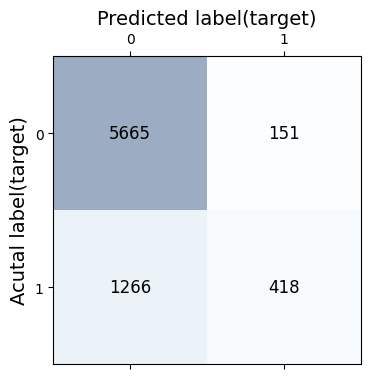

In [13]:
con_m = confusion_matrix(y_test, predicted_value, normalize=None)  # normalize=c('true','pred','all'), None

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(con_m, cmap=plt.cm.Blues, alpha=0.4)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j,y=i,s=np.round(con_m[i,j],3),va='center',ha='center', fontsize=12)
#plt.xlabel('predicted label(target)',fontsize=14)
plt.ylabel('Acutal label(target)', fontsize=14)
plt.title("Predicted label(target)",fontsize=14)
plt.show()

In [14]:
result = df.groupby("PAY_0")['default_YN'].agg({'count','sum','mean'})
result.rename(columns={"count":"total","sum":"target_1","mean":"P_1"}, inplace=True)

result['Odds'] = result['P_1'] / (1-result['P_1'])
result['log_Odds'] = np.log(result.P_1 / (1- result.P_1))
result

,total,target_1,P_1,Odds,log_Odds
PAY_0,,,,,
-2,2759,365,0.132294,0.152464,-1.880824
-1,5686,954,0.167781,0.201606,-1.601440
0,14737,1888,0.128113,0.146938,-1.917748
1,3688,1252,0.339479,0.513957,-0.665615
2,2667,1844,0.691414,2.240583,0.806736
3,322,244,0.757764,3.128205,1.140459
4,76,52,0.684211,2.166667,0.773190
5,26,13,0.500000,1.000000,0.000000
6,11,6,0.545455,1.200000,0.182322


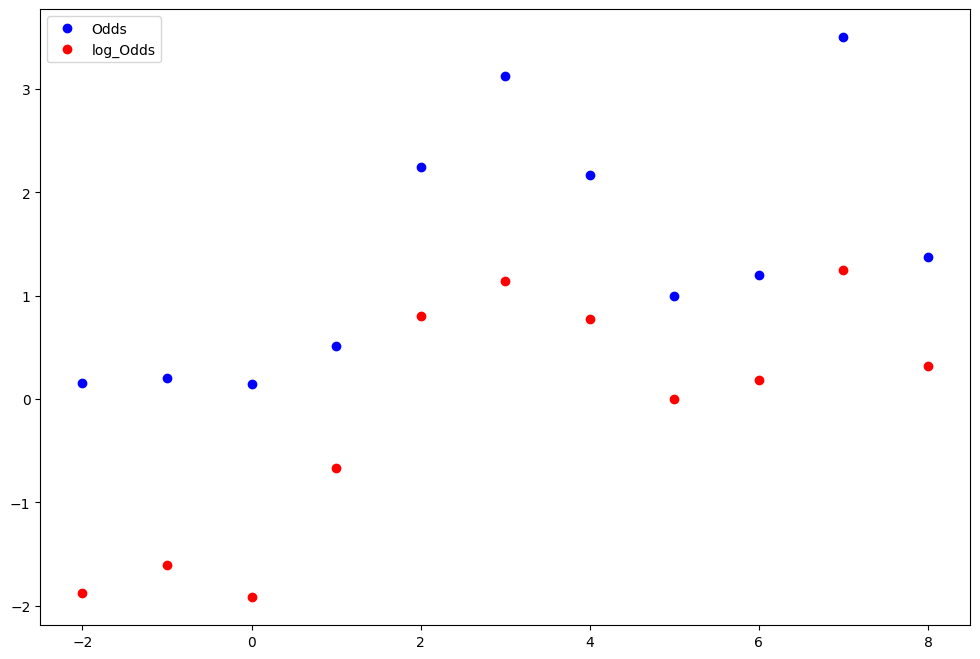

In [15]:
plt.figure(figsize=(12,8))

#sns.scatterplot(data=df, x="PAY_0", y='AGE', hue="default_YN")

#plt.plot(result.index, result.P_1,'r--')
#plt.xlabel("Variable/Feature")
#plt.ylabel("P_1:Probabilty")

plt.plot(result.index, result.Odds,'bo',label='Odds')
plt.plot(result.index, result.log_Odds, 'ro', label='log_Odds')

plt.legend()
plt.show()